In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [395]:
#importation et exploration des donnee
df=pd.read_csv('titanic.csv')
df.info()
df.describe().transpose()
df.shape
df.head(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


# netoyage des donnees

In [396]:
#connaitre le nbre de valeurs null qu'il ya das n]le dataframe
df.isnull().sum().sum()

869

In [397]:
#verifier le nbre de valeur null qu'il y a sur chaque colonne
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [398]:
#1ere etape detecter les different valeur unique de chaque colonne afin de pouvoir detecter les valeur qui  n'ont pas de sense
df['embarked'].unique()



array(['S', 'C', 'Q', nan], dtype=object)

In [334]:
#convertir la colonne age en int 
#cette methode  ne fonctionnera pas car la colonne contient des valeurs NAN
#df['age']=df['age'].astype(int)

In [335]:
df.head(3)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [336]:
# Supprimer les colonnes qui ne sont pas nécessaires
df = df.drop(['fare','who','adult_male','alive'], axis=1)

In [337]:
#supprimer les ligne de la colonne embarque qui on une valeur nam
df.dropna(subset=['embarked','embark_town'],inplace=True)

In [338]:
#supprimer la colonne deck

df.drop('deck',axis=1,inplace=True)

In [339]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
embarked         0
class            0
embark_town      0
alone            0
dtype: int64

In [340]:
df['age']=df['age'].replace(0,np.NaN)

In [341]:
df[df['age']==0] 

,survived,pclass,sex,age,sibsp,parch,embarked,class,embark_town,alone


In [342]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
embarked         0
class            0
embark_town      0
alone            0
dtype: int64

In [343]:
#remplacer les valeur manquante de l'age par la  moyenne
df['age'].fillna(df['age'].mean(),inplace=True)

In [344]:
df

,survived,pclass,sex,age,sibsp,parch,embarked,class,embark_town,alone
0,0,3,male,22.000000,1,0,S,Third,Southampton,False
1,1,1,female,38.000000,1,0,C,First,Cherbourg,False
2,1,3,female,26.000000,0,0,S,Third,Southampton,True
3,1,1,female,35.000000,1,0,S,First,Southampton,False
4,0,3,male,35.000000,0,0,S,Third,Southampton,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S,Second,Southampton,True
887,1,1,female,19.000000,0,0,S,First,Southampton,True
888,0,3,female,29.642093,1,2,S,Third,Southampton,False
889,1,1,male,26.000000,0,0,C,First,Cherbourg,True


In [345]:
# exercice bucketing/bining=age
#faite toutes les etape de preprocessing

# transformation des donnee

In [346]:
#convertir la colonne age  obejct en numerique
df['age']=pd.to_numeric(df['age'],errors='coerce').round().astype('Int64')

In [347]:
moyen=int(df['age'].mean())

df['age']=df['age'].replace(0,moyen)

In [348]:
df[df['age']==0]

,survived,pclass,sex,age,sibsp,parch,embarked,class,embark_town,alone


In [349]:
#on va regrouper les age du passager du titanic en tipe de genre de personne
age_groupe=[0,10,18,30,45,60,100]
# Définir les noms pour chaque groupe d'âge
age_nom = ["bébé","Enfants", "Jeunes adultes", "Adultes d'âge moyen", "Adultes plus âgés", "Seniors"]
#ajouter une nouvelle colonne pour agegroupe 
df['ageGroup']=pd.cut(df['age'],bins=age_groupe,labels=age_nom)
df['ageGroup'].unique()

['Jeunes adultes', 'Adultes d'âge moyen', 'Adultes plus âgés', 'bébé', 'Enfants', 'Seniors']
Categories (6, object): ['bébé' < 'Enfants' < 'Jeunes adultes' < 'Adultes d'âge moyen' < 'Adultes plus âgés' < 'Seniors']

In [350]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [351]:
# Encoder la variable Embarked afin d'attribuer a chaque valeur unique une colonne unique avec des valeur 1 ou 0
df = pd.get_dummies(df, columns=['embarked'])

In [352]:
df

,survived,pclass,sex,age,sibsp,parch,class,embark_town,alone,ageGroup,embarked_C,embarked_Q,embarked_S
0,0,3,male,22,1,0,Third,Southampton,False,Jeunes adultes,0,0,1
1,1,1,female,38,1,0,First,Cherbourg,False,Adultes d'âge moyen,1,0,0
2,1,3,female,26,0,0,Third,Southampton,True,Jeunes adultes,0,0,1
3,1,1,female,35,1,0,First,Southampton,False,Adultes d'âge moyen,0,0,1
4,0,3,male,35,0,0,Third,Southampton,True,Adultes d'âge moyen,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,Second,Southampton,True,Jeunes adultes,0,0,1
887,1,1,female,19,0,0,First,Southampton,True,Jeunes adultes,0,0,1
888,0,3,female,30,1,2,Third,Southampton,False,Jeunes adultes,0,0,1
889,1,1,male,26,0,0,First,Cherbourg,True,Jeunes adultes,1,0,0


In [353]:
# Encoder la variable Sex
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [354]:
#donner a chaque vcategorie une valeu numerique 
df['sex']=df['sex'].map({'female':0,'male':1})

In [355]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,class,embark_town,alone,ageGroup,embarked_C,embarked_Q,embarked_S
0,0,3,1,22,1,0,Third,Southampton,False,Jeunes adultes,0,0,1
1,1,1,0,38,1,0,First,Cherbourg,False,Adultes d'âge moyen,1,0,0
2,1,3,0,26,0,0,Third,Southampton,True,Jeunes adultes,0,0,1
3,1,1,0,35,1,0,First,Southampton,False,Adultes d'âge moyen,0,0,1
4,0,3,1,35,0,0,Third,Southampton,True,Adultes d'âge moyen,0,0,1


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    int64   
 3   age          889 non-null    Int64   
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   class        889 non-null    object  
 7   embark_town  889 non-null    object  
 8   alone        889 non-null    bool    
 9   ageGroup     889 non-null    category
 10  embarked_C   889 non-null    uint8   
 11  embarked_Q   889 non-null    uint8   
 12  embarked_S   889 non-null    uint8   
dtypes: Int64(1), bool(1), category(1), int64(5), object(2), uint8(3)
memory usage: 67.9+ KB


In [357]:
# Créer une nouvelle colonne de famille pour counter le nobre de famille de chaque passager
df['nobreFamily'] = df['sibsp'] + df['parch']

In [358]:
df.drop(['sibsp','parch'],axis=1,inplace=True)

In [359]:
df.head(6)

,survived,pclass,sex,age,class,embark_town,alone,ageGroup,embarked_C,embarked_Q,embarked_S,nobreFamily
0,0,3,1,22,Third,Southampton,False,Jeunes adultes,0,0,1,1
1,1,1,0,38,First,Cherbourg,False,Adultes d'âge moyen,1,0,0,1
2,1,3,0,26,Third,Southampton,True,Jeunes adultes,0,0,1,0
3,1,1,0,35,First,Southampton,False,Adultes d'âge moyen,0,0,1,1
4,0,3,1,35,Third,Southampton,True,Adultes d'âge moyen,0,0,1,0
5,0,3,1,30,Third,Queenstown,True,Jeunes adultes,0,1,0,0


In [360]:
df['nobreFamily'].value_counts()

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: nobreFamily, dtype: int64

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    int64   
 3   age          889 non-null    Int64   
 4   class        889 non-null    object  
 5   embark_town  889 non-null    object  
 6   alone        889 non-null    bool    
 7   ageGroup     889 non-null    category
 8   embarked_C   889 non-null    uint8   
 9   embarked_Q   889 non-null    uint8   
 10  embarked_S   889 non-null    uint8   
 11  nobreFamily  889 non-null    int64   
dtypes: Int64(1), bool(1), category(1), int64(4), object(2), uint8(3)
memory usage: 61.0+ KB


In [362]:
for i in df.select_dtypes(include=['category']):
    df[i]=df[i].cat.codes
df

,survived,pclass,sex,age,class,embark_town,alone,ageGroup,embarked_C,embarked_Q,embarked_S,nobreFamily
0,0,3,1,22,Third,Southampton,False,2,0,0,1,1
1,1,1,0,38,First,Cherbourg,False,3,1,0,0,1
2,1,3,0,26,Third,Southampton,True,2,0,0,1,0
3,1,1,0,35,First,Southampton,False,3,0,0,1,1
4,0,3,1,35,Third,Southampton,True,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,Second,Southampton,True,2,0,0,1,0
887,1,1,0,19,First,Southampton,True,2,0,0,1,0
888,0,3,0,30,Third,Southampton,False,2,0,0,1,3
889,1,1,1,26,First,Cherbourg,True,2,1,0,0,0


In [363]:
#voire les colonne de type objects
cols = df.select_dtypes(include=['object']).columns
cols

Index(['class', 'embark_town'], dtype='object')

In [364]:
#convertir tous les valeur de type category et les remplacer par des entier
df['class'].unique()
df['class']=df['class'].map({'Third':0,'First':1,'Second':2})

In [365]:
df['embark_town'].unique()
df['embark_town']=df['embark_town'].map({'Southampton':0,'Cherbourg':1,'Queenstown':2})

In [366]:
#convertir un type bool en entier
df['alone'] = df['alone'].astype(int)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   survived     889 non-null    int64
 1   pclass       889 non-null    int64
 2   sex          889 non-null    int64
 3   age          889 non-null    Int64
 4   class        889 non-null    int64
 5   embark_town  889 non-null    int64
 6   alone        889 non-null    int32
 7   ageGroup     889 non-null    int8 
 8   embarked_C   889 non-null    uint8
 9   embarked_Q   889 non-null    uint8
 10  embarked_S   889 non-null    uint8
 11  nobreFamily  889 non-null    int64
dtypes: Int64(1), int32(1), int64(6), int8(1), uint8(3)
memory usage: 63.4 KB


In [368]:
df

,survived,pclass,sex,age,class,embark_town,alone,ageGroup,embarked_C,embarked_Q,embarked_S,nobreFamily
0,0,3,1,22,0,0,0,2,0,0,1,1
1,1,1,0,38,1,1,0,3,1,0,0,1
2,1,3,0,26,0,0,1,2,0,0,1,0
3,1,1,0,35,1,0,0,3,0,0,1,1
4,0,3,1,35,0,0,1,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,2,0,1,2,0,0,1,0
887,1,1,0,19,1,0,1,2,0,0,1,0
888,0,3,0,30,0,0,0,2,0,0,1,3
889,1,1,1,26,1,1,1,2,1,0,0,0


In [369]:
df[df['sex'].isin([1])].groupby(['survived','sex']).mean().transpose()

survived,0,1
sex,1,1
pclass,2.476496,2.018349
age,31.237179,27.944954
class,0.553419,0.724771
embark_town,0.303419,0.321101
alone,0.741453,0.587156
ageGroup,2.378205,2.12844
embarked_C,0.141026,0.266055
embarked_Q,0.081197,0.027523
embarked_S,0.777778,0.706422


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

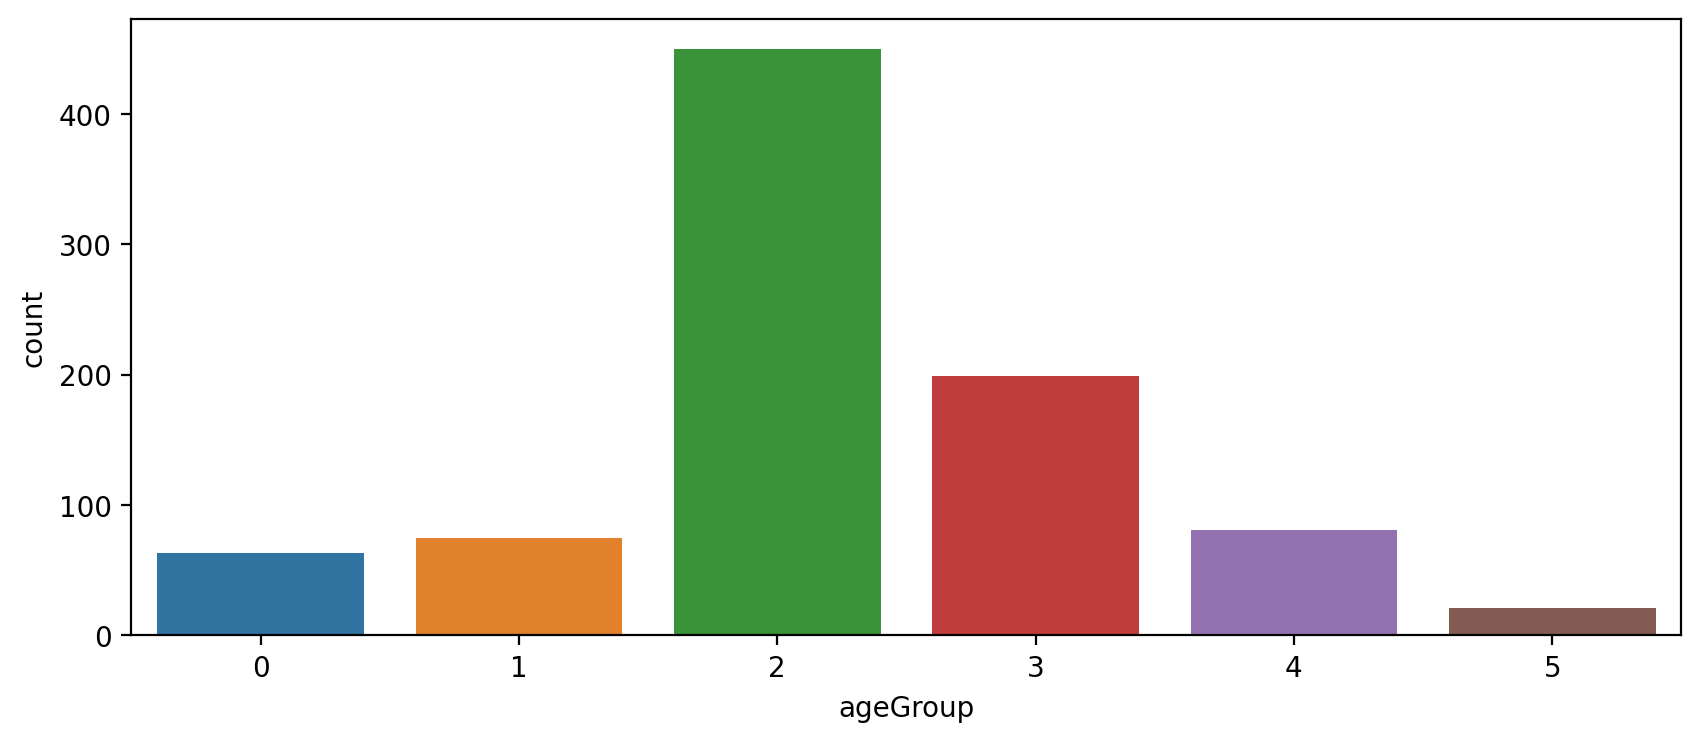

In [388]:
#visualisation de ageGroupe dans le dataframe 
fig=plt.figure(figsize=(10,4),dpi=200)

sns.countplot(x='ageGroup',data=df);
plt.xticks(                       )

<AxesSubplot:title={'center':'bar plot of age'}, xlabel='age', ylabel='ageGroup count'>

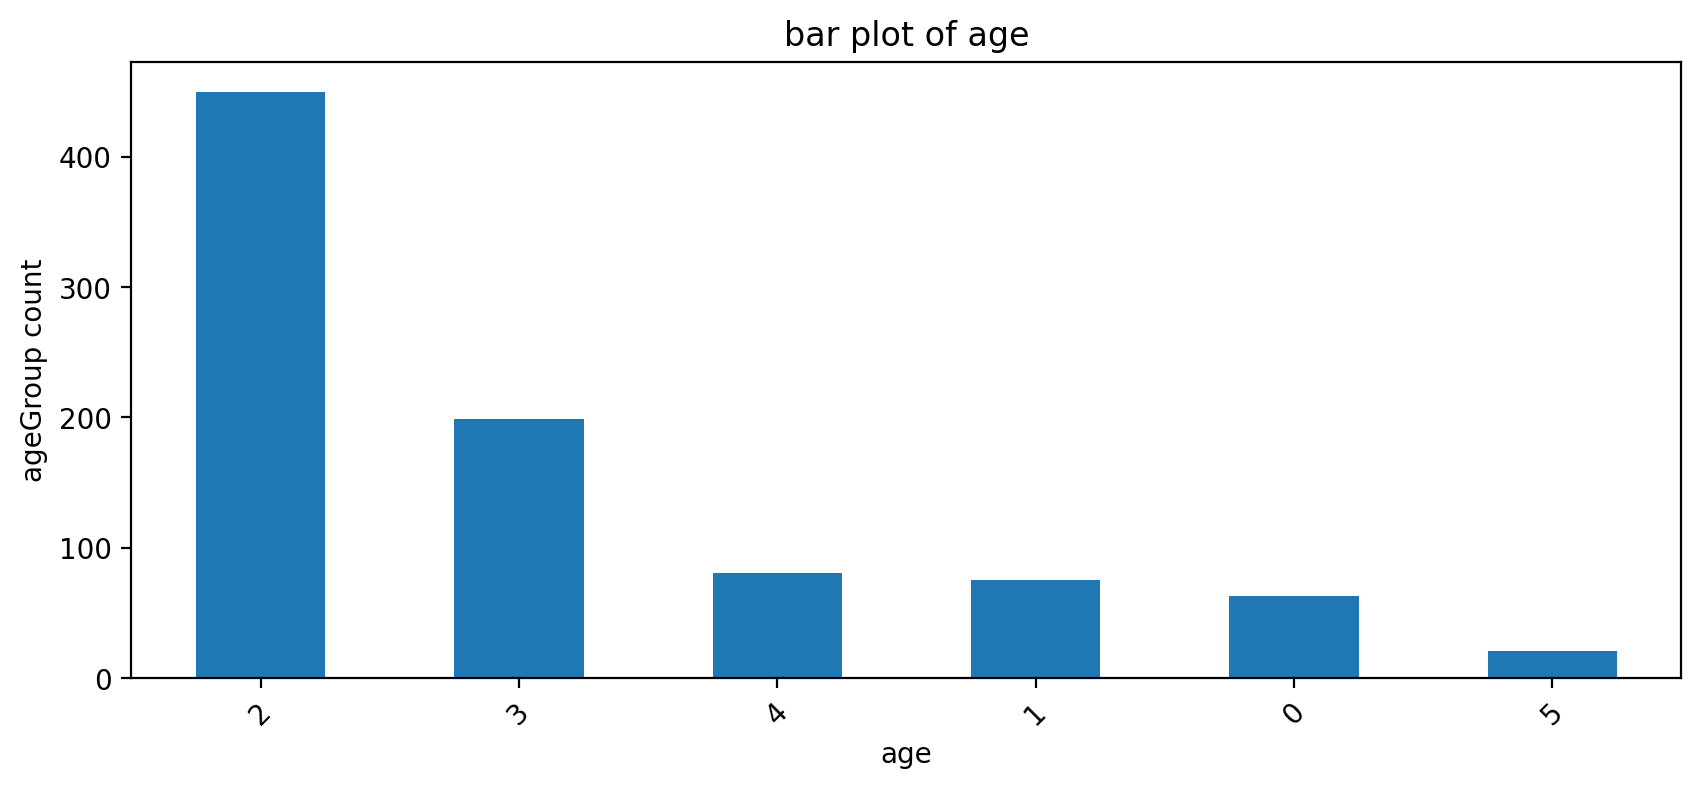

In [387]:
plt.figure(figsize=(10,4),dpi=200)
plt.xlabel("age")
plt.ylabel("ageGroup count")
plt.title("bar plot of age")
vc=df['ageGroup'].value_counts()
vc.plot.bar(rot=45)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

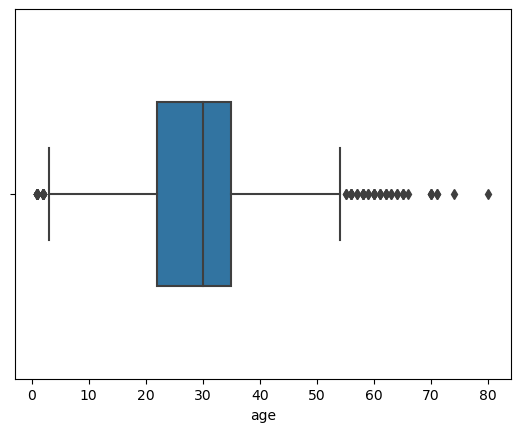

In [390]:
sns.boxplot(df['age'],width=0.5)

<AxesSubplot:xlabel='age', ylabel='sex'>

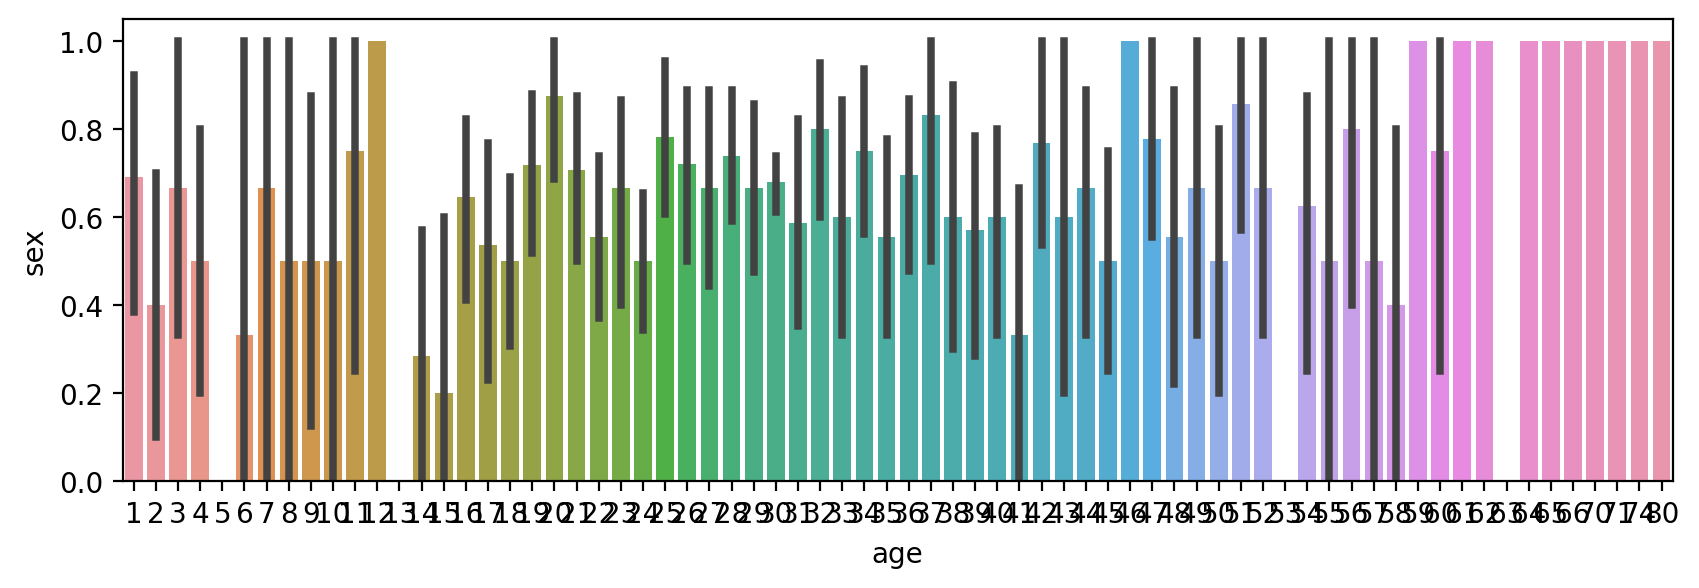

In [393]:
fig=plt.figure(figsize=(10,3),dpi=200)
sns.barplot(x=df['age'],y=df['sex'])